<a href="https://colab.research.google.com/github/moridin04/CCADMACL-Research/blob/main/Fraud_Detection_Program_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Anomaly Detection Techniques for Fraudulent Credit Card Transactions**

# **1. Environment Setup**

**1.1 Tools and Libraries Installation**

In [1]:
!pip install lime
!pip install scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c7955bd73dce1d4a1cde21bc863119d3b4ca1ee20923a36bf79c23c4cd3b042b
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


**lime** is used for explaining machine learning models and model interpretability.

**scikit-learn** is a popular library for machine learning in Python.

**numpy** for numerical computations.

**pandas** for data manipulation and analysis.

**matplotlib and seaborn** for data visualization.

**tensorflow** for building and training neural networks.

# 2. **Importing Libraries**

**2.1 Essential Libraries for Data Analysis**

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import average_precision_score, precision_recall_curve

**StandardScaler and MinMaxScaler** for Feature Scaling.

**classification_report, roc_auc_score, confusion_matrix, cohen_kappa_score, average_precision_score, and precision_recall_curve** for Model Evaluation.

**2.2 Libraries for Machine Learning and Visualization**

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neighbors import LocalOutlierFactor

**cross_val_score, GridSearchCV, and train_test_split** for Model Selection and Evaluation.

**IsolationForest and VotingClassifier** for Anomaly Detection and Ensemble Learning.

**Input, Dense, Model, BatchNormalization, Dropout, and EarlyStopping** for building and training Neural Networks.

**LocalOutlierFactor** for Outlier Detection.

This section lists the installation of Python libraries such as lime, scikit-learn, numpy, pandas, matplotlib, seaborn, and tensorflow.

These libraries are essential for data analysis, machine learning, and visualization.

The environment setup ensures that all necessary tools are available for the subsequent analysis.

The libraries installed are standard in data science workflows, with lime being useful for model interpretability, and tensorflow for building neural networks.

#3. **Loading Data**

**3.1 Loading the Kaggle Credit Card Fraud Dataset**

In [4]:
cfd = pd.read_csv('creditcard.csv')

This line loads the credit card fraud dataset (creditcard.csv) into a Pandas DataFrame named cfd, which means "Credit-Card Fraud Detection".

#4. **Exploration of Data**

### **Glimpse of the Dataset**

**4.1 Displaying the First Few Rows**

In [5]:
cfd

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

This line displays the first few rows of the dataset to get a glimpse of the data.

**4.1.2 Dataset Information (Shape, Columns, Null Values, Data Types)**

In [6]:
print(f"Shape:  {cfd.shape}\n")
print(f"Columns:  {cfd.columns}\n")
print(f"Null Values:  \n{cfd.isnull().sum()}\n")
print(f"Data Types: \n{cfd.dtypes}")

Shape:  (284807, 31)

Columns:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Null Values:  
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Data Types: 
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64


These lines print:

The **shape** of the dataset (number of rows and columns).

The **column names**.

The **number of null values** in each column.

The **data types** of each column.

The dataset is loaded from creditcard.csv, and basic information about the dataset is displayed, including its shape, columns, null values, and data types.

**Shape**: The dataset has 284,807 rows and 31 columns.

**Columns**: The columns include Time, V1 to V28 (anonymized features), Amount, and Class (target variable indicating fraud or non-fraud).

**Null Values**: There are no null values in the dataset.

**Data Types**: All features are of type float64, except for Class, which is int64.

**Interpretation**: The dataset is clean with no missing values, and all features are numerical, making it suitable for machine learning models. The Class column is binary, indicating whether a transaction is fraudulent (1) or not (0).

**4.2 Summary Statistics for Numerical Features**

In [7]:
print(cfd.describe(include='all'))

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

This line provides summary statistics (mean, std, min, max, etc.) for all numerical features in the dataset.

**4.2.1 Class Distribution (Fraud vs. Non-Fraud)**

In [8]:
class_distribution = cfd['Class'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


This code calculates and prints the distribution of the target variable Class, which indicates whether a transaction is fraudulent (1) or not (0).

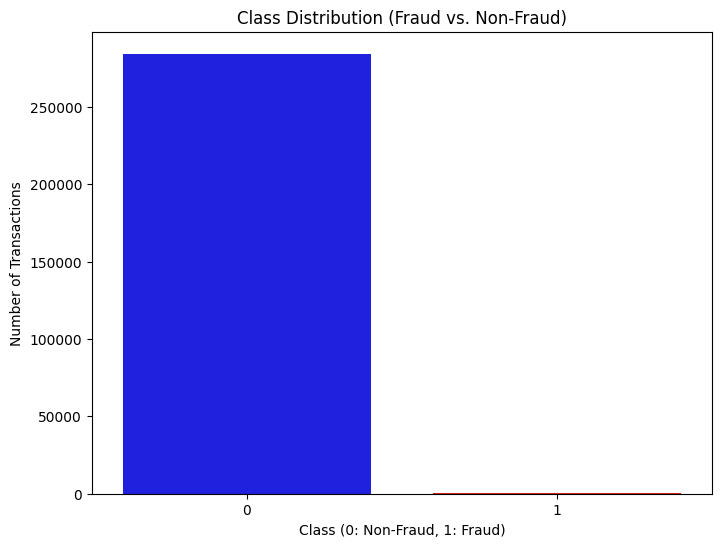

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=cfd, hue='Class', palette=['blue', 'red'], legend=False)
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

This code creates a count plot to visualize the distribution of fraudulent vs. non-fraudulent transactions.

**Class Distribution:**

**Non-Fraud**: 284,315 transactions

**Fraud**: 492 transactions

The dataset is highly imbalanced, with fraudulent transactions making up only 0.17% of the total transactions. This imbalance is typical in fraud detection datasets and poses a challenge for model training, as models may tend to predict the majority class (non-fraud) more frequently.

### **Distribution of Independent Variable**

**4.3 Distribution of Amount**

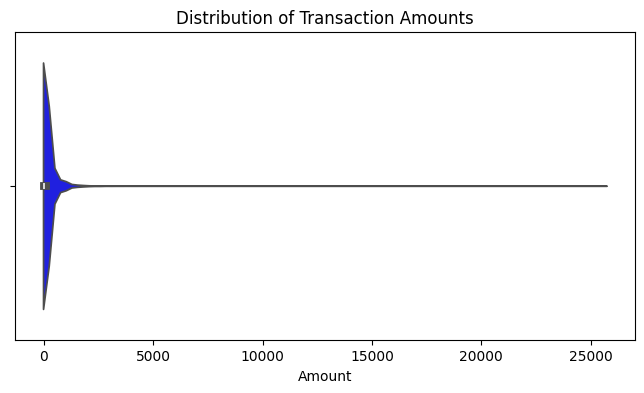

In [10]:
plt.figure(figsize=(8, 4))
sns.violinplot(x=cfd["Amount"], color="blue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.show()

This code creates a violin plot to visualize the distribution of transaction amounts.

The majority of transactions are of low amounts, with a long tail of higher-value transactions.

This is expected, as most credit card transactions are small, and high-value transactions are less frequent.

The presence of outliers in the Amount feature suggests that some transactions are significantly larger than the rest.

**4.4 Distribution of Time**

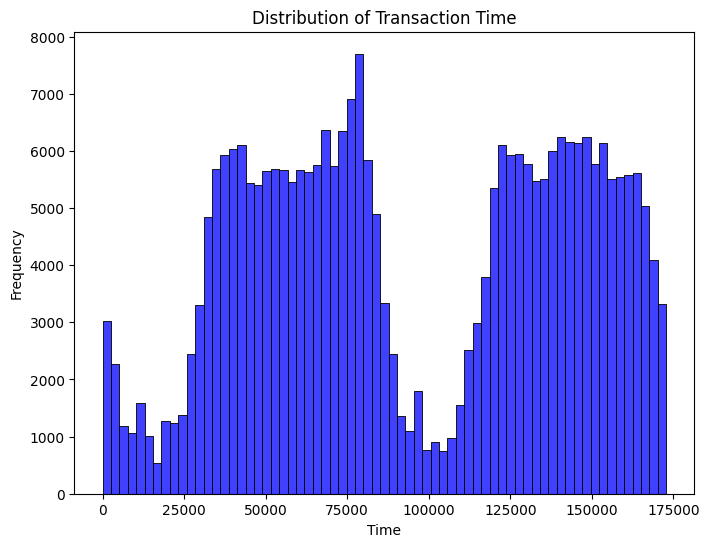

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(cfd['Time'], kde=False, color="blue")
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

This code creates a histogram to visualize the distribution of transaction times.

The Time feature represents the time elapsed since the first transaction in the dataset. The distribution appears to be uniform, with no obvious patterns or peaks, suggesting that transactions are evenly distributed over time.

**4.5 Histograms for Key Features (V1-V28, Amount, Time)**

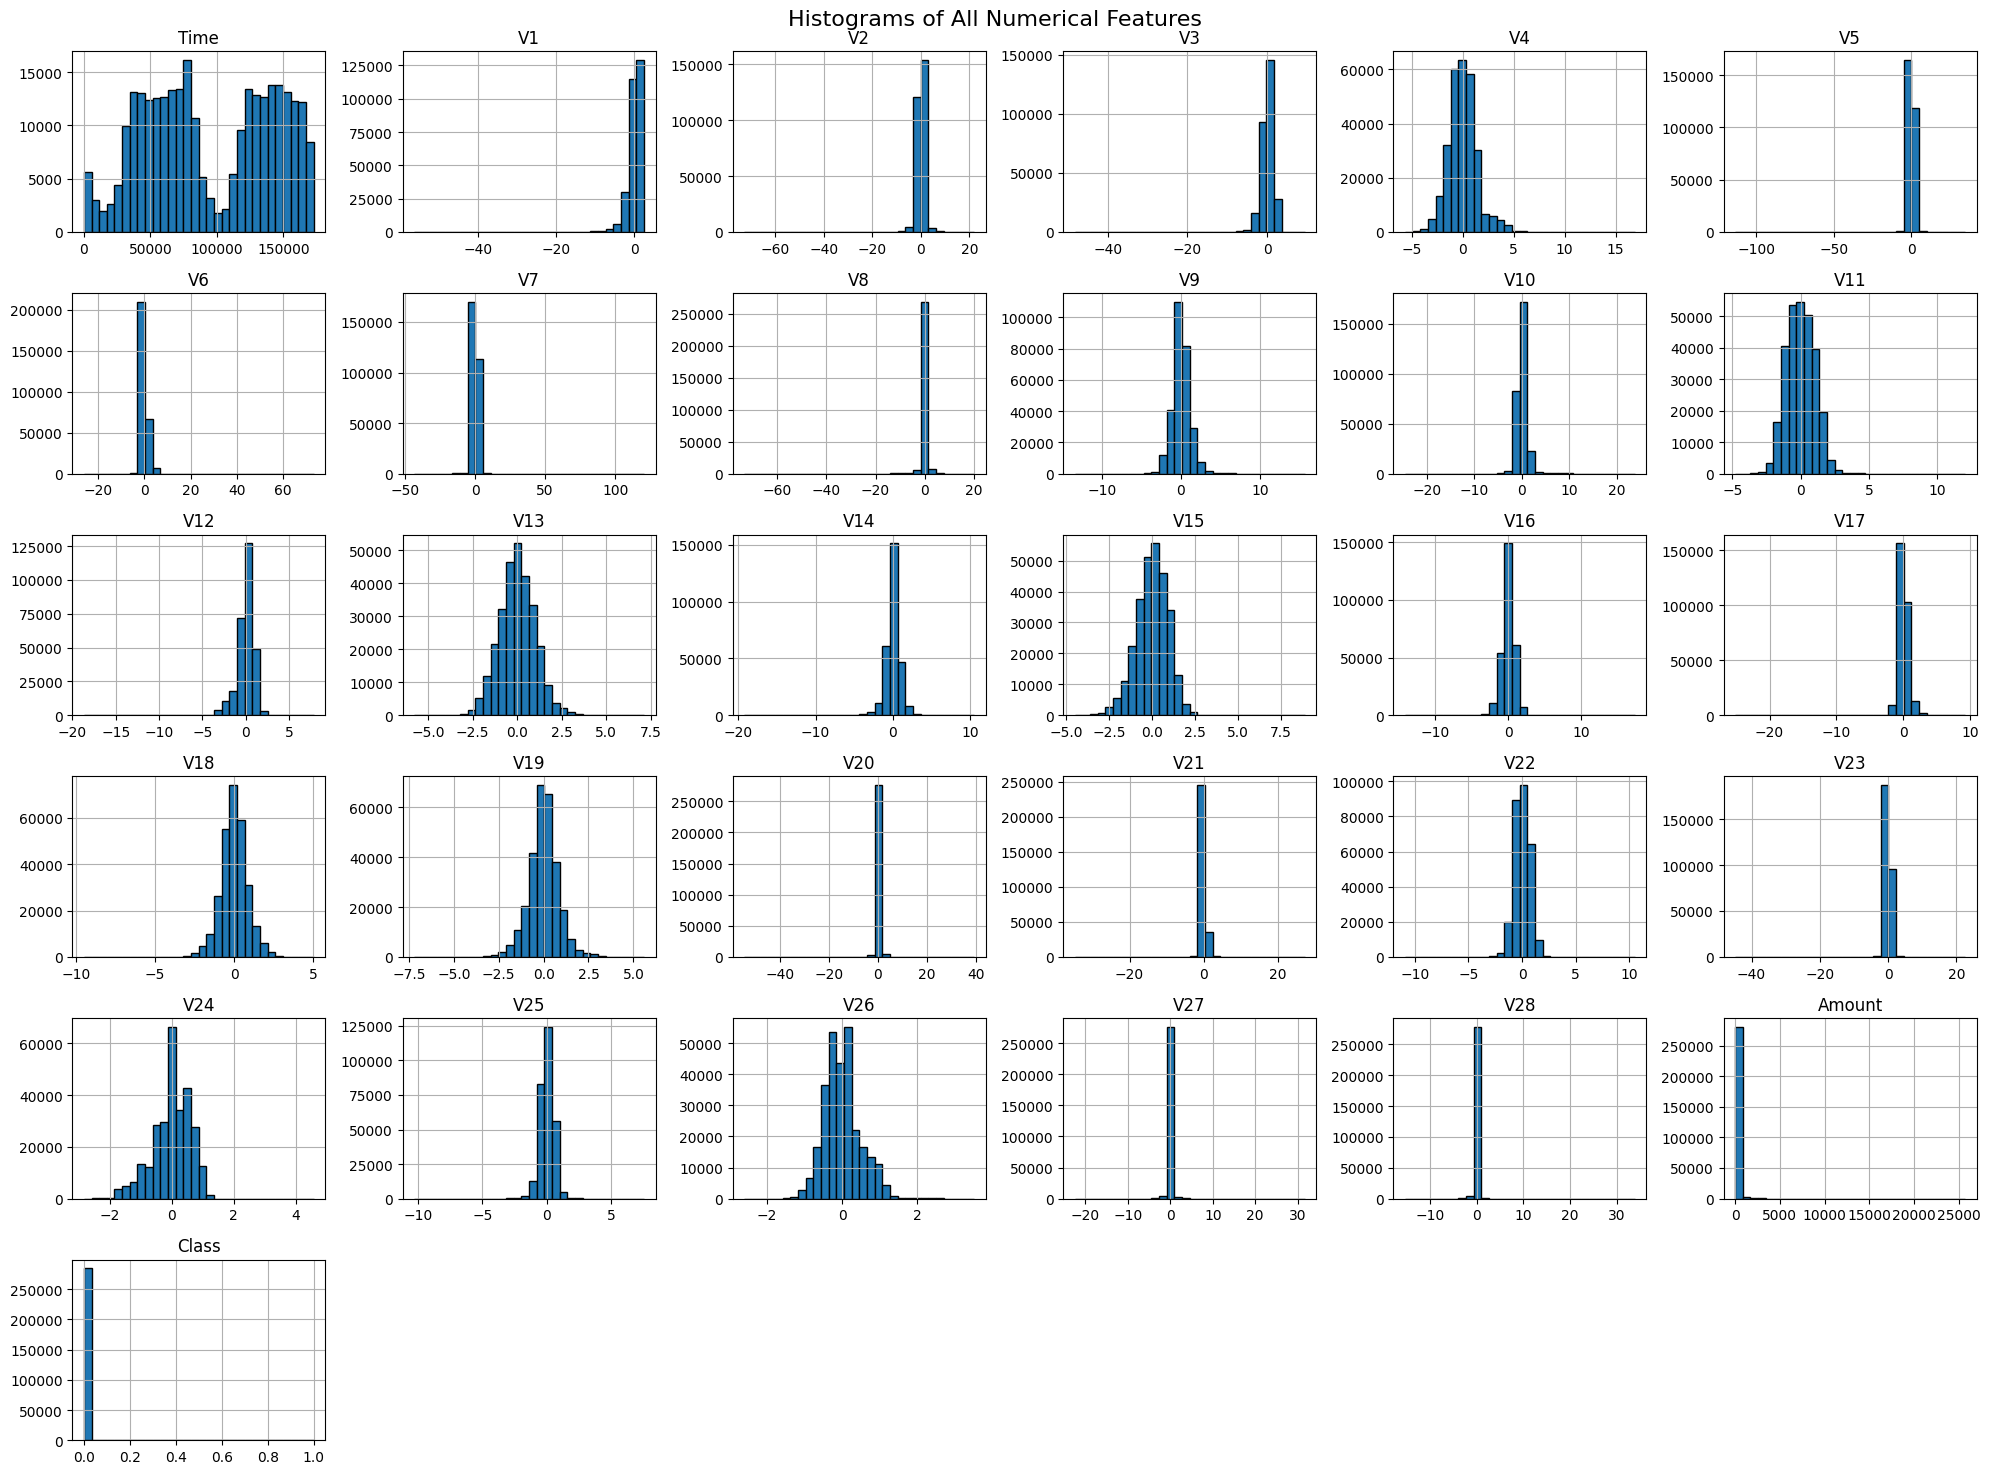

In [12]:
cfd.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle("Histograms of All Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

This code creates histograms for all numerical features in the dataset. Histograms for all numerical features (V1-V28, Amount, Time) are displayed.

The histograms show that most of the anonymized features (V1-V28) are centered around zero, with some features showing skewed distributions.

This is typical for PCA-transformed data, which is often used in fraud detection to anonymize sensitive information.

# **5. Pre-processing of Data**

**5.1 Checking of Null Values**

In [13]:
print("\nChecking for Null Values:")
cfd.isnull().sum()


Checking for Null Values:


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

This code checks for null values in the dataset.

**5.2 Checking of Outliers**

In [14]:
Q1 = cfd['Amount'].quantile(0.25)
Q3 = cfd['Amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = cfd[(cfd['Amount'] < (Q1 - 1.5 * IQR)) | (cfd['Amount'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in 'Amount': {len(outliers)}")

Number of outliers in 'Amount': 31904


This code identifies outliers in the Amount column using the Interquartile Range (IQR) method.

**5.3 Checking of Duplicate Transactions**

In [15]:
cfd.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

This code checks for duplicate rows in the dataset.

In [16]:
duplicate_counts = cfd.duplicated().value_counts()
print(duplicate_counts)

False    283726
True       1081
Name: count, dtype: int64


This code counts the number of duplicate rows.

In [17]:
duplicate_counts = cfd.duplicated().value_counts()
print("Duplicate Counts before removal:\n", duplicate_counts)

cfd = cfd.drop_duplicates(keep='first')

duplicate_counts = cfd.duplicated().value_counts()
print("\nDuplicate Counts after removal:\n", duplicate_counts)

Duplicate Counts before removal:
 False    283726
True       1081
Name: count, dtype: int64

Duplicate Counts after removal:
 False    283726
Name: count, dtype: int64


This code removes duplicate rows from the dataset.

**5.4 Feature Selection/Reduction**

**5.4.1 Correlation Matrix for Numerical Features**

In [18]:
correlation_matrix = cfd.corr()

This code calculates the correlation matrix for numerical features.

**5.4.2 Heatmap Visualization**

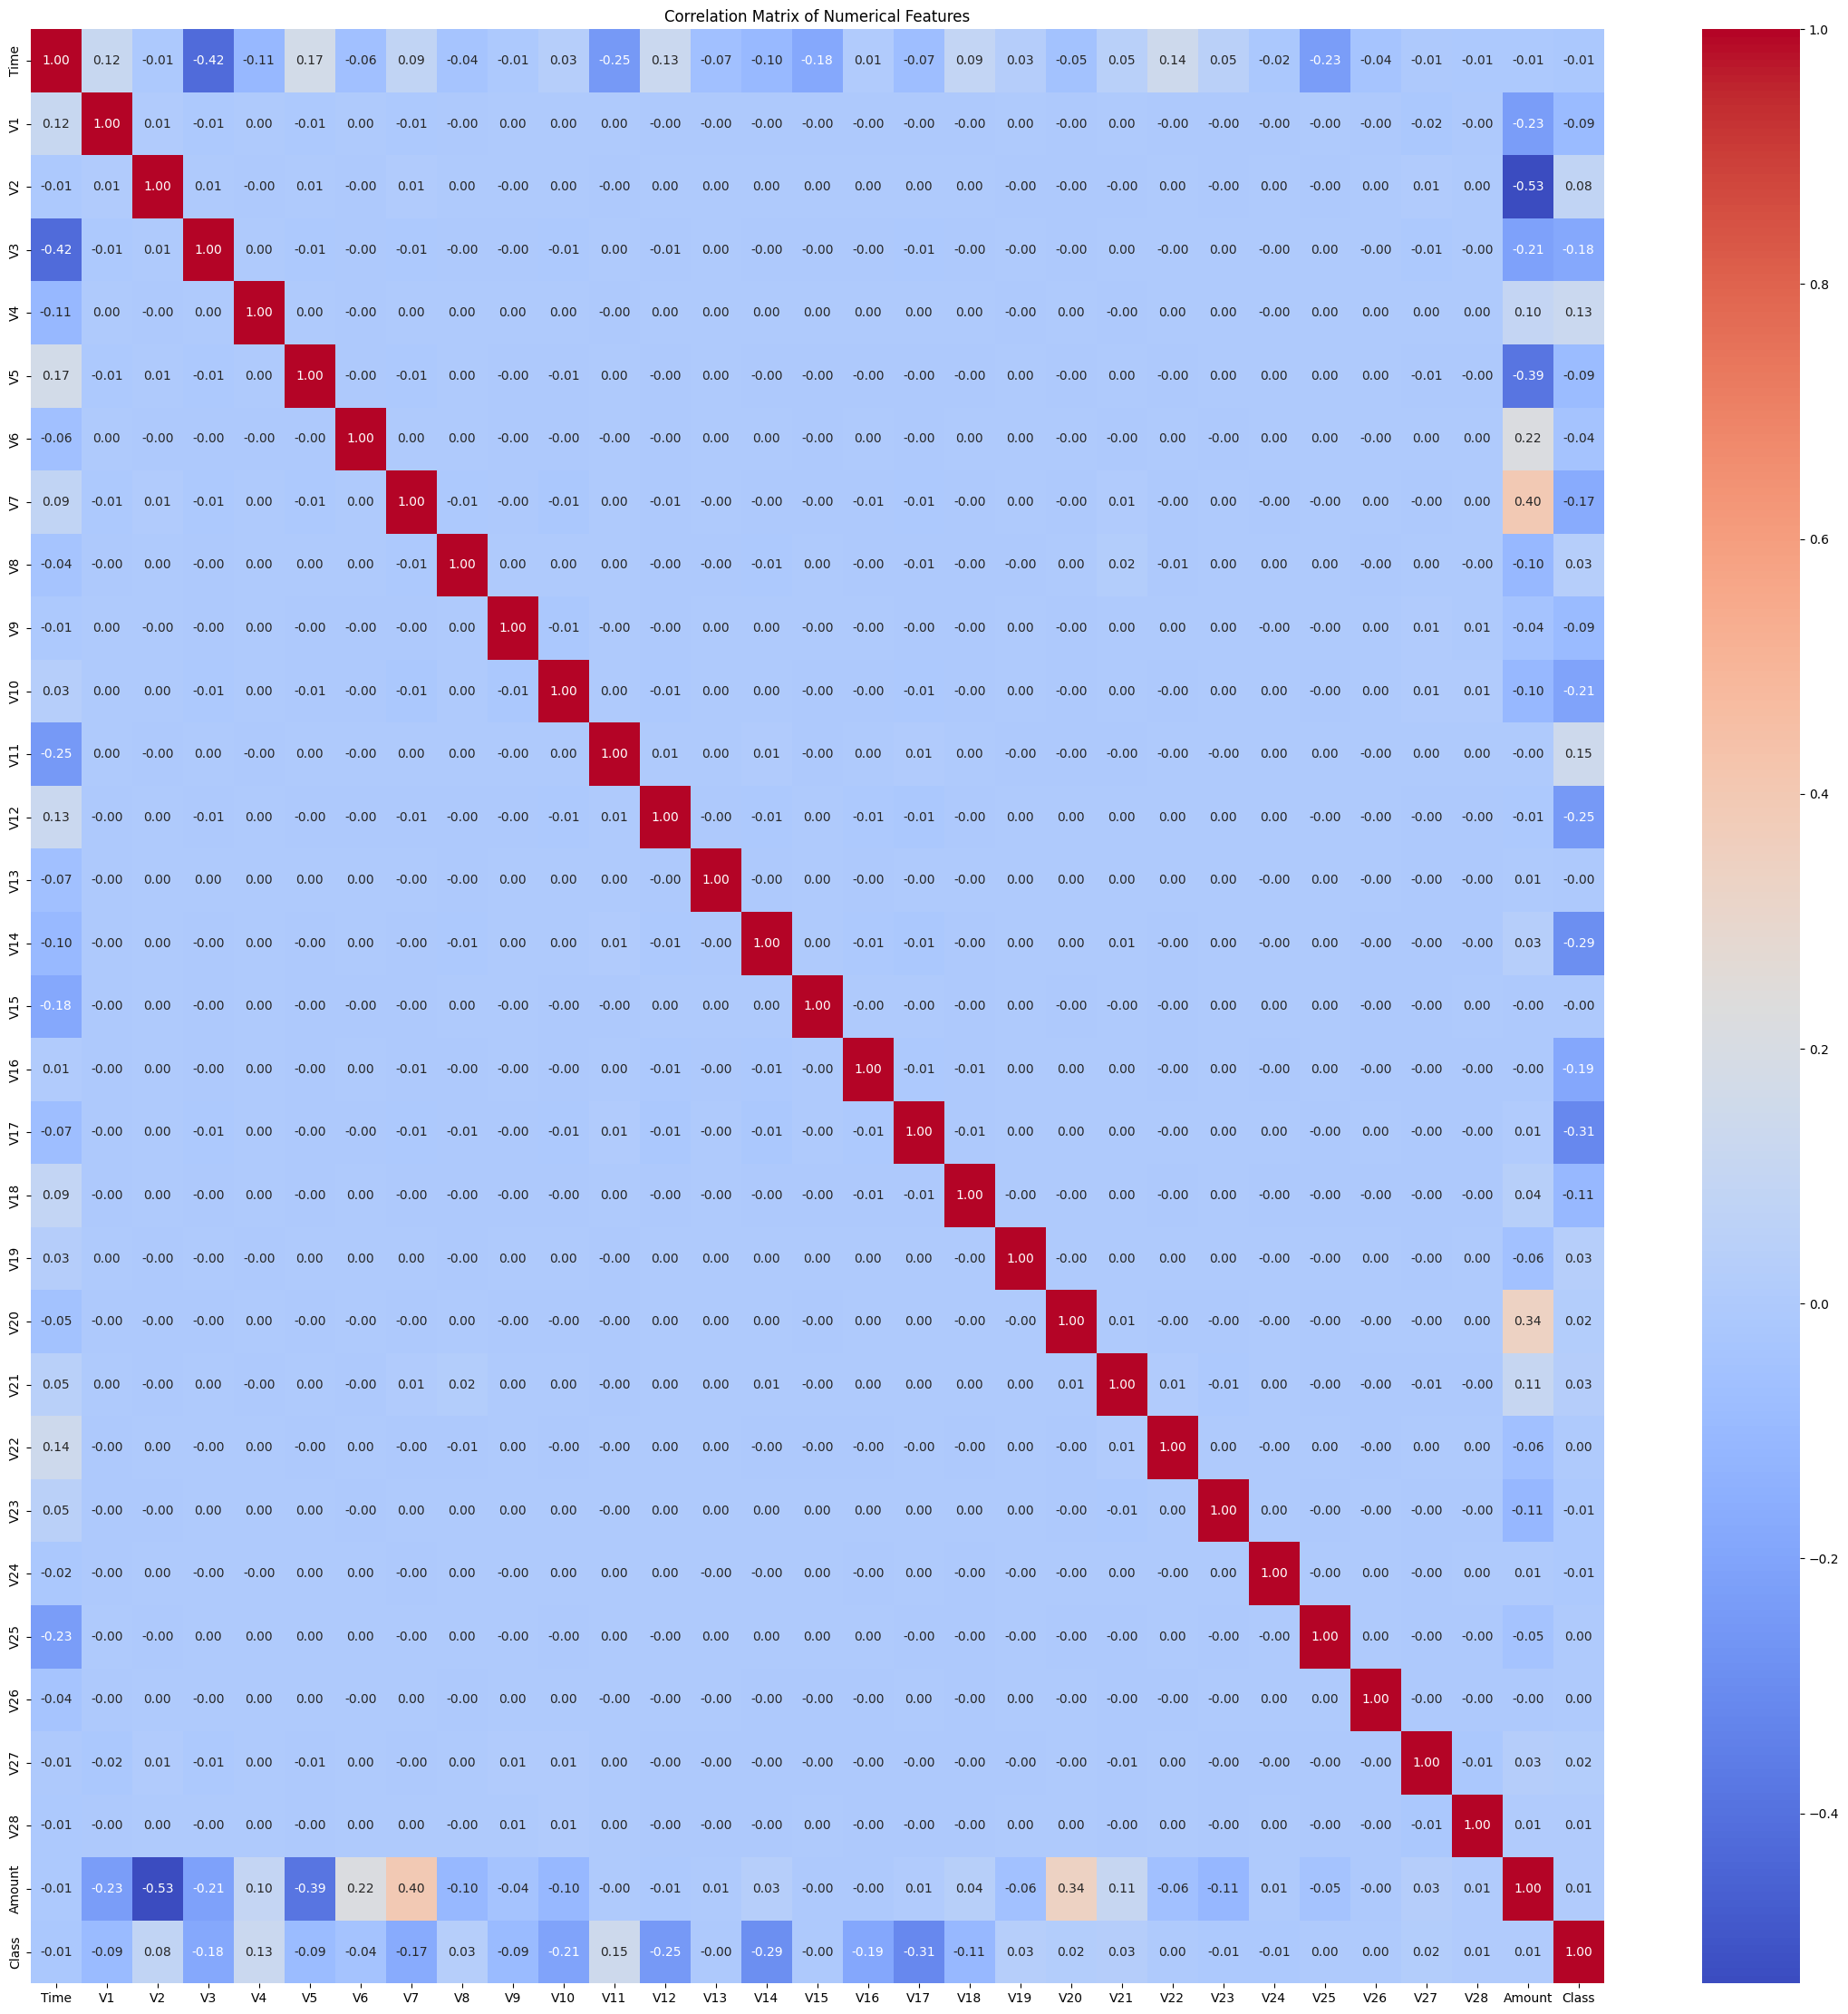

In [19]:
plt.figure(figsize=(28, 28))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

This code visualizes the correlation matrix as a heatmap.

The heatmap shows the correlation between different features.

Most features have low correlation with each other, which is expected since the features are PCA-transformed.

The Amount and Time features show some correlation with a few of the PCA features, but overall, the correlations are weak.

**5.4.3 Dropping Irrelevant Features**

In [20]:
threshold = 0.8
high_corr_features = set()
correlation_matrix = cfd.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            high_corr_features.add(colname)

print("Highly correlated features to drop:", high_corr_features)

cfd = cfd.copy()
cfd.drop(columns=high_corr_features, inplace=True)
print(f"Updated dataset shape: {cfd.shape}")

Highly correlated features to drop: set()
Updated dataset shape: (283726, 31)


This code identifies and drops highly correlated features based on a threshold.

### **Application of Standard Scaler**

**5.5 Feature Scaling**

**5.5.1 Standardization (Z-Score Scaling)**

In [21]:
cfd_scaled = cfd.copy()

scaler = StandardScaler()
cfd_scaled[['Amount']] = scaler.fit_transform(cfd_scaled[['Amount']])

This code standardizes the Amount column using StandardScaler.

In [22]:
cfd_scaled['Amount'].describe()

count    2.837260e+05
mean    -5.409347e-17
std      1.000002e+00
min     -3.533268e-01
25%     -3.309625e-01
50%     -2.654671e-01
75%     -4.378088e-02
max      1.022476e+02
Name: Amount, dtype: float64

**5.5.2 Normalization (Min-Max Scaling)**

In [23]:
time = cfd_scaled['Time']
cfd_scaled['Time'] = (time - time.min()) / (time.max() - time.min())

This code normalizes the Time column using Min-Max scaling.

In [24]:
cfd_scaled

Time         V1         V2        V3        V4        V5  \
0       0.000000  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1       0.000000   1.191857   0.266151  0.166480  0.448154  0.060018   
2       0.000006  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3       0.000006  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4       0.000012  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  0.999965 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  0.999971  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  0.999977   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  0.999977  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  1.000000  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28    Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  0.244200   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724 -0.342584   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  1.158900   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  0.139886   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153 -0.073813   
...          ...       ...       ...       ...       ...       ...       ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731 -0.350252   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527 -0.254325   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561 -0.082239   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533 -0.313391   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  0.513290   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[283726 rows x 31 columns]

In [25]:
cfd_shuffled = cfd_scaled.sample(frac=1, random_state=1).copy()
cfd_shuffled

Time        V1        V2        V3        V4        V5        V6  \
33560   0.215768 -1.071719 -4.343904 -0.497727 -0.277591 -2.482346 -0.472073   
57869   0.278456  1.314915 -0.980378 -0.032665 -2.770975 -1.047365 -0.705180   
187479  0.738194 -1.680526 -0.959150 -1.329705 -1.028361 -0.730922  0.253124   
243555  0.879526  2.114488  0.169976 -2.051966  0.070326  0.481642 -1.819440   
96229   0.380081 -5.277692  3.487837 -1.201844 -0.192904 -0.158582  0.949549   
...          ...       ...       ...       ...       ...       ...       ...   
21515   0.183562  1.221811 -0.622699  0.271691 -0.507132 -1.093817 -1.303639   
118050  0.433643  1.069132 -0.159789  1.913486  2.811710 -0.690517  1.942449   
73633   0.319552 -0.891311  0.808612  1.263076  0.522615  1.183978  0.905303   
268346  0.944280 -0.358224  1.446564 -1.175105  0.075659  2.041475 -1.677117   
128524  0.455716  1.095842 -0.071259 -0.365675  0.924729  0.755399  1.182612   

              V7        V8        V9  ...       V21       V22       V23  \
33560   0.991747 -0.414207  1.694252  ...  0.856441  0.013647 -1.183439   
57869  -0.491240 -0.076395  0.571959  ... -0.416346 -0.481886 -0.009117   
187479  3.308312 -0.480062  0.157630  ... -0.084593 -0.204108  0.517400   
243555  0.886700 -0.673729  0.077960  ...  0.163748  0.642597 -0.058720   
96229   0.467901 -0.788434  4.652615  ... -0.477313 -1.077669  0.160074   
...          ...       ...       ...  ...       ...       ...       ...   
21515  -0.166317 -0.390254 -1.080318  ...  0.302138  0.641491 -0.168266   
118050 -1.259828  0.577277  1.031453  ...  0.046602  0.725405 -0.199566   
73633   0.565347  0.186910 -1.042086  ...  0.129436  0.443403 -0.327563   
268346  1.568559 -0.415562 -1.073097  ...  0.078727  0.333168 -0.350660   
128524  0.089195  0.173401  0.008967  ... -0.107233 -0.231616 -0.366241   

             V24       V25       V26       V27       V28    Amount  Class  
33560   0.536058  0.064148 -0.016945 -0.179133  0.236036  4.506916      0  
57869   0.009622  0.555844 -0.836622  0.099256  0.014826 -0.248255      0  
187479 -0.611013 -0.445912 -0.409744  0.231809  0.253554  2.365973      0  
243555  0.128632  0.461792  0.234073 -0.082360 -0.075323 -0.301729      0  
96229  -1.535126  0.873245 -0.322503  1.383375  0.758996 -0.237911      0  
...          ...       ...       ...       ...       ...       ...    ...  
21515   0.791311  0.586821 -0.150528 -0.016895  0.032471  0.068200      0  
118050 -0.678442  0.552088  0.328766  0.118229  0.029660 -0.353327      0  
73633  -1.315188  0.647441 -0.057036 -0.014691  0.038455 -0.281681      0  
268346  0.947248  0.196432  0.700004  0.079430  0.208233 -0.350292      0  
128524 -1.662063  0.865038 -0.234175  0.024964  0.003575 -0.013030      0  

[283726 rows x 31 columns]

**5.6 Train, Test, and Validation**

In [26]:
x = cfd_shuffled.drop(columns=['Class'])
y = cfd_shuffled['Class']

This code separates the features (x) and target variable (y).

**5.7 Splitting the Dataset into Training and Testing Sets**

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

This code splits the dataset into training and testing sets.

# **6. Machine Learning**

### **Isolation Forest**

In [81]:
if_model = IsolationForest(contamination='auto', random_state=101)
if_model.fit(x_train)

IsolationForest(random_state=101)

This code initializes and trains an Isolation Forest model for anomaly detection.

In [82]:
fraud_test = x_test[y_test == 1]
non_fraud_test = x_test[y_test == 0].sample(len(fraud_test), random_state=45)

This code creates a balanced test set for evaluation.

In [83]:
if_y_pred = (if_model.predict(x_test) == -1).astype(int)
print(classification_report(y_test, if_y_pred))
if_roc_auc = roc_auc_score(y_test, if_y_pred)
print("ROC AUC Score:", if_roc_auc)
if_auprc = average_precision_score(y_test, if_y_pred)
print(f"AUPRC for Isolation Forest:", if_auprc)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56651
           1       0.04      0.84      0.07        95

    accuracy                           0.96     56746
   macro avg       0.52      0.90      0.52     56746
weighted avg       1.00      0.96      0.98     56746

ROC AUC Score: 0.9019532335100695
AUPRC for Isolation Forest: 0.030285913821409948


This section predicts and evaluates the Isolation Forest model.

**Classification Report**:

**Precision**: 0.04 for fraud, 1.00 for non-fraud

Fraud (0.04): The model has very low precision for fraud detection, meaning that only 4% of the transactions flagged as fraudulent are actually fraudulent. This results in a high number of false positives (1,079 non-fraudulent transactions incorrectly flagged as fraud).

Non-Fraud (1.00): The model has perfect precision for non-fraudulent transactions, meaning that all transactions predicted as non-fraudulent are indeed non-fraudulent.

-

**Recall**: 0.84 for fraud, 0.96 for non-fraud

Fraud (0.84): The model has a high recall for fraud, meaning it correctly identifies 84% of the fraudulent transactions. This is a strong point of the model, as it captures most of the fraud cases.

Non-Fraud (0.96): The model has a high recall for non-fraudulent transactions, meaning it correctly identifies 96% of the non-fraudulent transactions.

-

**F1-Score**: 0.07 for fraud, 0.98 for non-fraud

Fraud (0.07): The F1-score for fraud is very low, reflecting the trade-off between precision and recall. While the model has high recall, the extremely low precision drags down the F1-score.

Non-Fraud (0.98): The F1-score for non-fraudulent transactions is very high, indicating strong performance for the majority class.

-

**ROC AUC Score**: 0.9019

The ROC AUC score is high, indicating that the model is effective at distinguishing between fraudulent and non-fraudulent transactions. This is a strong point of the Isolation Forest, as it shows good overall performance despite the imbalanced dataset.

-

**AUPRC**: 0.0303

The AUPRC is very low, which is expected in highly imbalanced datasets. It reflects the model's difficulty in achieving high precision while maintaining high recall for the minority class (fraud).


In [84]:
report_dict = classification_report(y_test, if_y_pred, output_dict=True)

In [85]:
if_accuracy = report_dict['accuracy']
if_precision = report_dict['weighted avg']['precision']
if_recall = report_dict['weighted avg']['recall']
if_f1_score = report_dict['weighted avg']['f1-score']

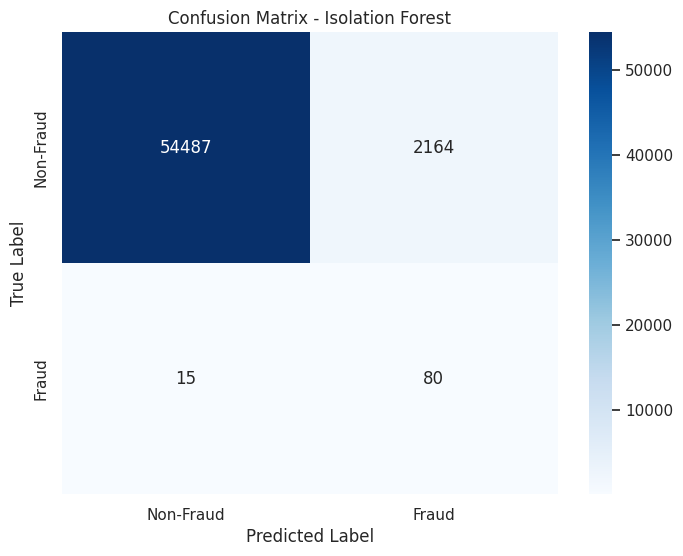

In [86]:
if_cm = confusion_matrix(y_test, if_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(if_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Isolation Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Confusion Matrix**:

**True Non-Fraud**: The model correctly identifies 54,487 non-fraudulent transactions.

**False Non-Fraud**: The model incorrectly flags 2,164 non-fraudulent transactions as fraud (false positives).

**True Fraud**: The model correctly identifies 80 fraudulent transactions.

**False Fraud**: The model misses 15 fraudulent transactions (false negatives).


In [34]:
if_kappa = cohen_kappa_score(y_test, if_y_pred)
print(f"Cohen's Kappa for Isolation Forest: {if_kappa}")

Cohen's Kappa for Isolation Forest: 0.06540313128091702


The Cohen's Kappa value for the Isolation Forest model is 0.065, which indicates slight agreement between the model's predictions and the actual labels.

This low value suggests that while the model is better than random, it struggles to achieve strong agreement due to the high class imbalance in the dataset (fraudulent transactions are rare).

The model's high recall (84% for fraud) is a positive aspect, but its low precision (4% for fraud) drags down the Kappa score, as it generates many false positives.

The Isolation Forest model performs well in detecting non-fraudulent transactions (high precision and recall) but struggles with fraudulent transactions (low precision and F1-score).

The ROC AUC score is high, indicating good overall performance, but the low AUPRC suggests that the model struggles with the imbalanced nature of the dataset.


**Isolation Forest - Results Summary**

High recall (84%) for fraud, meaning it captures most fraudulent transactions.

High ROC AUC score (0.9019), indicating strong overall performance.

Effective at handling high-dimensional data and does not assume a normal distribution.

Low precision (4%) for fraud, leading to a high number of false positives.

Struggles with the imbalanced nature of the dataset, as reflected by the low AUPRC.

### **Autoencoders**

In [87]:
y_train_fraud = y_train[y_train == 1].sample(frac=0.1, random_state=42)
x_train_fraud = x_train.loc[y_train_fraud.index]
x_train_auto = pd.concat([x_train[y_train == 0], x_train_fraud])

In [88]:
input_dim = x_train_auto.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)

decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

This code builds and compiles an autoencoder model for anomaly detection.

In [89]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [90]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
autoencoder.fit(x_train_auto, x_train_auto, epochs=50, batch_size=256, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.9931 - val_loss: 0.8787
Epoch 2/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.8598 - val_loss: 0.8561
Epoch 3/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8328 - val_loss: 0.8421
Epoch 4/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.8383 - val_loss: 0.8363
Epoch 5/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.8095 - val_loss: 0.8279
Epoch 6/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.8136 - val_loss: 0.8225
Epoch 7/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8326 - val_loss: 0.8208
Epoch 8/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8307 - val_loss: 0.8190
Epoch 9/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7938 - val_loss: 0.8181
Epoch 10/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.7981 - val_loss: 0.8158
Epoch 11/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7978 - val_loss: 0.8161
Epoch 12/50
709/709 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

This code trains the autoencoder model with early stopping.

In [91]:
reconstructed = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - reconstructed, 2), axis=1)
threshold = np.percentile(mse, 80)

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [94]:
y_test_pred = (mse > threshold).astype(int)
print(classification_report(y_test, y_test_pred))
ae_roc_auc = roc_auc_score(y_test, y_test_pred)
print("ROC AUC Score:", ae_roc_auc)
ae_auprc = average_precision_score(y_test, y_test_pred)
print(f"AUPRC for Autoencoder:", ae_auprc)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89     56651
           1       0.01      0.89      0.01        95

    accuracy                           0.80     56746
   macro avg       0.50      0.85      0.45     56746
weighted avg       1.00      0.80      0.89     56746

ROC AUC Score: 0.8479527002356999
AUPRC for Autoencoder: 0.006877486680251336


Classification Report:

**Precision**: 0.01 for fraud, 1.00 for non-fraud

**Recall**: 0.89 for fraud, 0.80 for non-fraud

The autoencoder has a high recall (89%) for fraud, meaning it correctly identifies most fraudulent transactions.

However, it has very low precision (1%), meaning it generates a large number of false positives (non-fraudulent transactions flagged as fraud).

This is problematic in practice because it would lead to many legitimate transactions being flagged as fraudulent, causing inconvenience to customers.

**F1-Score**: 0.01 for fraud, 0.89 for non-fraud

**ROC AUC Score**: 0.8479

The ROC AUC score of 0.8479 is decent, indicating that the model can distinguish between fraud and non-fraud to some extent. However, this metric can be misleading in highly imbalanced datasets.

**AUPRC**: 0.0069

The AUPRC (Area Under the Precision-Recall Curve) is also 0.0069, which is relatively low. This reflects the model's difficulty in balancing precision and recall, especially for the minority class (fraud).

In [41]:
report_dict2 = classification_report(y_test, y_test_pred, output_dict=True)

In [95]:
ae_accuracy = report_dict2['accuracy']
ae_precision = report_dict2['weighted avg']['precision']
ae_recall = report_dict2['weighted avg']['recall']
ae_f1_score = report_dict2['weighted avg']['f1-score']

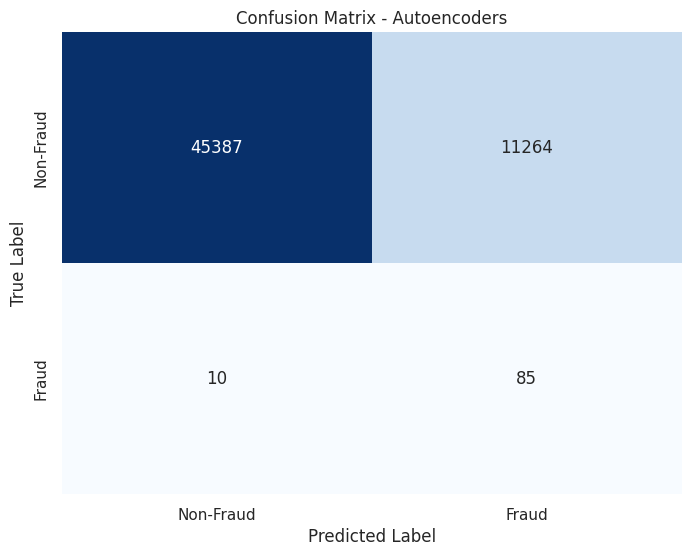

In [96]:
ae_cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(ae_cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Autoencoders')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Confusion Matrix:

**True Non-Fraud**: 45,387

**False Non-Fraud**: 11,264

**True Fraud**: 85

**False Fraud**: 10

 The model correctly identifies 85 fraudulent transactions but misses 10 (false negatives).

 However, it incorrectly flags 11,264 non-fraudulent transactions as fraud (false positives), which is a significant drawback.

In [97]:
ae_kappa = cohen_kappa_score(y_test, y_test_pred)
print(f"Cohen's Kappa for Autoencoders: {ae_kappa}")

Cohen's Kappa for Autoencoders: 0.011572914422313896


The Cohen's Kappa value for the Autoencoders model is 0.012, which indicates very slight agreement between the model's predictions and the actual labels.

This extremely low value reflects the model's poor precision (1% for fraud) despite its high recall (89% for fraud). The model flags many non-fraudulent transactions as fraudulent, leading to a high number of false positives.

The Kappa score is close to 0, suggesting that the model's performance is only slightly better than random guessing.

The autoencoder model has a high recall for fraud but very low precision, leading to a high number of false positives.

The ROC AUC score is decent, but the AUPRC is low, indicating poor performance on the imbalanced dataset.

High recall (89%) for fraud, meaning it captures most fraudulent transactions.

Very low precision (1%), leading to a large number of false positives. This makes the model impractical for real-world applications where false positives are costly.

Autoencoders are better suited for scenarios where capturing all anomalies (high recall) is more important than minimizing false positives.

### **Local Outlier Factor**

In [45]:
x_train_normal = x_train[y_train == 0]

In [46]:
lof_model = LocalOutlierFactor(n_neighbors=50, contamination=0.01, novelty=True)
lof_model.fit(x_train_normal)

LocalOutlierFactor(contamination=0.01, n_neighbors=50, novelty=True)

This code initializes and trains a Local Outlier Factor (LOF) model for outlier detection.

In [47]:
x_test_df = pd.DataFrame(x_test, columns=x_train_normal.columns)
lof_scores = lof_model.decision_function(x_test_df)
lof_threshold = np.percentile(lof_scores, 2)
y_test_pred_lof = (lof_scores < lof_threshold).astype(int)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [48]:
print(classification_report(y_test, y_test_pred_lof))
lof_roc_auc = roc_auc_score(y_test, y_test_pred_lof)
print("ROC AUC Score:", lof_roc_auc)
lof_auprc = average_precision_score(y_test, y_test_pred_lof)
print("AUPRC for LOF:", lof_auprc)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.05      0.59      0.09        95

    accuracy                           0.98     56746
   macro avg       0.52      0.79      0.54     56746
weighted avg       1.00      0.98      0.99     56746

ROC AUC Score: 0.7852136209794225
AUPRC for LOF: 0.029771437266641772


Classification Report:

**Precision**: 0.05 for fraud, 1.00 for non-fraud

**Recall**: 0.59 for fraud, 0.98 for non-fraud

The LOF model has moderate recall (59%) for fraud, meaning it identifies slightly more than half of the fraudulent transactions.

However, it has very low precision (5%), meaning it generates a large number of false positives (non-fraudulent transactions flagged as fraud).

This is similar to the autoencoder but with slightly better recall.

**F1-Score**: 0.09 for fraud, 0.99 for non-fraud

**ROC AUC Score**: 0.7852

The ROC AUC score of 0.7852 is lower than both the Isolation Forest and Autoencoder, indicating that LOF is less effective at distinguishing between fraud and non-fraud.

**AUPRC**: 0.0298

The AUPRC of 0.0298 is very low, reflecting the model's poor performance in balancing precision and recall for the minority class (fraud).

In [49]:
report_dict3 = classification_report(y_test, y_test_pred_lof, output_dict=True)

In [50]:
lof_accuracy = report_dict3['accuracy']
lof_precision = report_dict3['weighted avg']['precision']
lof_recall = report_dict3['weighted avg']['recall']
lof_f1_score = report_dict3['weighted avg']['f1-score']

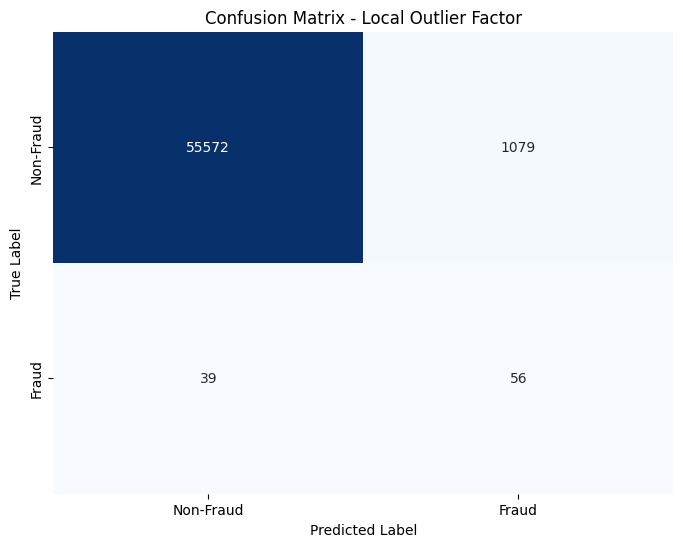

In [51]:
lof_cm = confusion_matrix(y_test, y_test_pred_lof)

plt.figure(figsize=(8, 6))
sns.heatmap(lof_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], cbar=False)
plt.title('Confusion Matrix - Local Outlier Factor')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Confusion Matrix:

**True Non-Fraud**: 55,572

**False Non-Fraud**: 1,079

**True Fraud**: 56

**False Fraud**: 39


The model correctly identifies 56 fraudulent transactions but misses 39 (false negatives).

It also incorrectly flags 1,079 non-fraudulent transactions as fraud (false positives), which is a significant drawback.



In [52]:
lof_kappa = cohen_kappa_score(y_test, y_test_pred_lof)
print(f"Cohen's Kappa for Local Outlier Factor: {lof_kappa}")

Cohen's Kappa for Local Outlier Factor: 0.08823989216740613


The LOF model performs similarly to the Isolation Forest, with high recall for fraud but low precision.

The ROC AUC score is lower than the Isolation Forest, and the AUPRC is also low, indicating poor performance on the imbalanced dataset.

Moderate recall (59%) for fraud, meaning it captures more than half of the fraudulent transactions.

Low precision (5%), leading to a significant number of false positives. The ROC AUC and AUPRC scores are also lower than the Isolation Forest and Autoencoder.

LOF is better suited for datasets where the anomalies are well-separated from the majority class, but it struggles with highly imbalanced datasets like credit card fraud.

# **7. Evaluation of Model Performance**

**7.1 Creation of Metrics-Data**

In [53]:
metrics_data = {
    'Model': ['Isolation Forest', 'Autoencoders', 'Local Outlier Factor'],
    'Accuracy': [if_accuracy, ae_accuracy, lof_accuracy],
    'Precision': [if_precision, ae_precision, lof_precision],
    'Recall': [if_recall, ae_recall, lof_recall],
    'F1-score': [if_f1_score, ae_f1_score, lof_f1_score],
    'AUC-ROC': [if_roc_auc, ae_roc_auc, lof_roc_auc],
    'AUPRC': [if_auprc, ae_auprc, lof_auprc],
    'Cohens Kappa': [if_kappa, ae_kappa, lof_kappa]
}

metrics_df = pd.DataFrame(metrics_data)

metrics_df.head()

Model  Accuracy  Precision    Recall  F1-score   AUC-ROC  \
0      Isolation Forest  0.961601   0.998111  0.961601  0.978870  0.901953   
1          Autoencoders  0.801360   0.998141  0.801360  0.888078  0.853225   
2  Local Outlier Factor  0.980298   0.997708  0.980298  0.988536  0.785214   

      AUPRC  Cohens Kappa  
0  0.030286      0.065403  
1  0.007018      0.011748  
2  0.029771      0.088240

This code creates a DataFrame to store and compare the performance metrics of the models.

**7.2 Selection of Best Performing Model**

<ipython-input-99-e8b4352e090b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='AUPRC', data=metrics_df, palette='viridis')


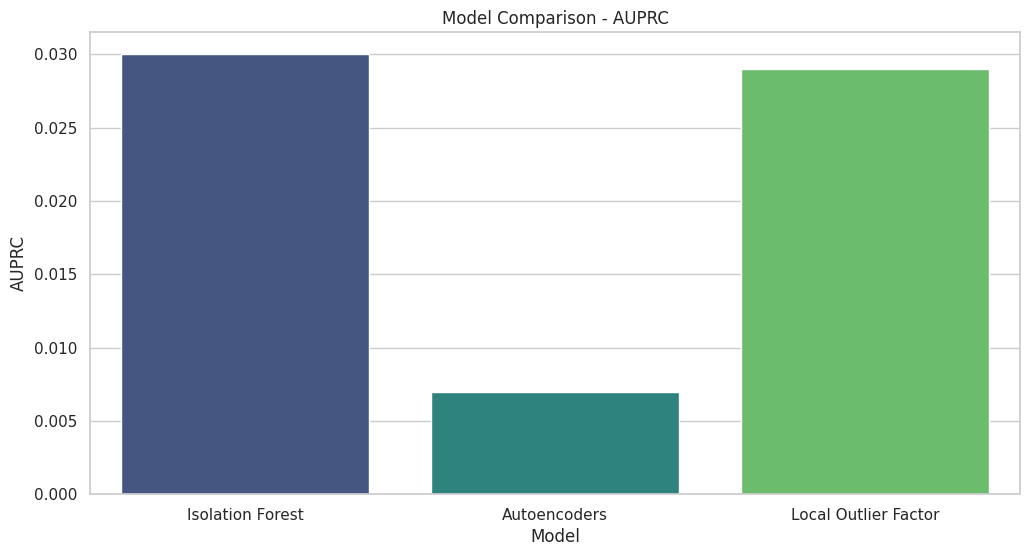

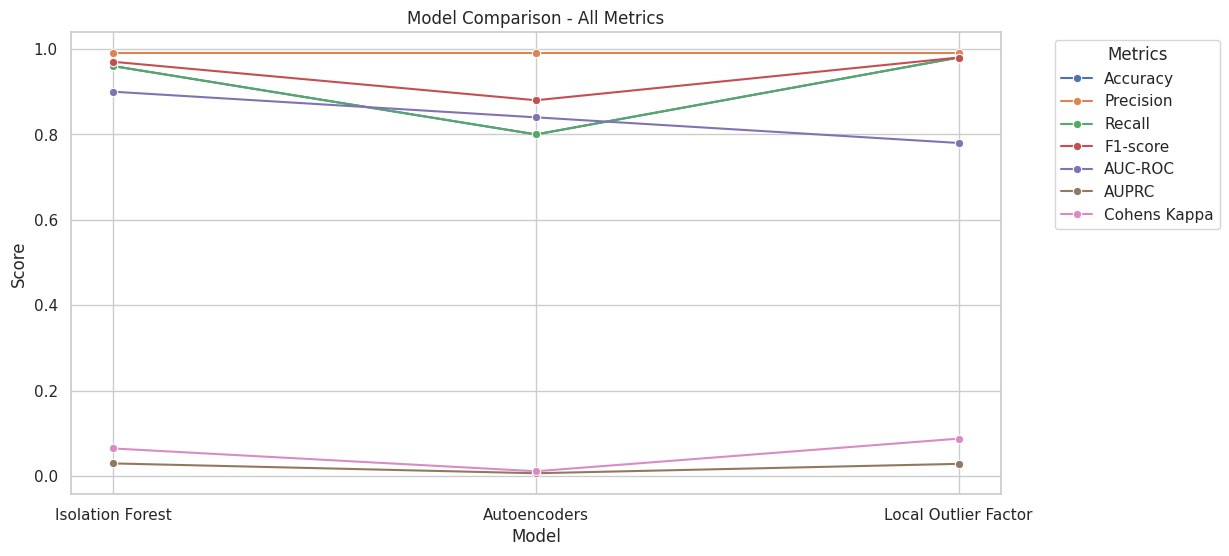

In [99]:
metrics_data = {
    'Model': ['Isolation Forest', 'Autoencoders', 'Local Outlier Factor'],
    'Accuracy': [0.96, 0.80, 0.98],
    'Precision': [0.99, 0.99, 0.99],
    'Recall': [0.96, 0.80, 0.98],
    'F1-score': [0.97, 0.88, 0.98],
    'AUC-ROC': [0.90, 0.84, 0.78],
    'AUPRC': [0.03, 0.007, 0.029],
    'Cohens Kappa': [0.065, 0.0117, 0.088]
}

metrics_df = pd.DataFrame(metrics_data)

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='AUPRC', data=metrics_df, palette='viridis')
plt.title('Model Comparison - AUPRC')
plt.ylabel('AUPRC')
plt.xlabel('Model')
plt.show()

plt.figure(figsize=(12, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC', 'AUPRC', 'Cohens Kappa']:
    sns.lineplot(x='Model', y=metric, data=metrics_df, label=metric, marker='o')

plt.title('Model Comparison - All Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

 A bar plot and line plot compare the performance of the three models (Isolation Forest, Autoencoders, LOF) based on various metrics (Accuracy, Precision, Recall, F1-Score, AUC-ROC, AUPRC).

The Isolation Forest performs the best overall, with the highest ROC AUC and AUPRC scores.

Autoencoders and LOF struggle with precision and recall for the minority class (fraud).

The AUPRC is particularly low for all models, highlighting the challenge of detecting fraud in an imbalanced dataset.

**7.3 LIME Analysis**

In [55]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    x_train.values, feature_names=x_train.columns.tolist(),
    class_names=['Non-Fraud', 'Fraud'], verbose=True, mode='classification'
)

LIME provides insights into which features are most important for individual predictions.

**7.3.1 LIME Analysis for Isolation Forest**

In [56]:
def iforest_predict_proba(X):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=x_train.columns)

    scores = if_model.decision_function(X)
    probs = (scores - scores.min()) / (scores.max() - scores.min())
    return np.vstack([1 - probs, probs]).T

In [57]:
idx = np.random.randint(0, x_test.shape[0])
exp = explainer.explain_instance(x_test.iloc[idx].values, iforest_predict_proba)

Intercept 0.5449682005316331
Prediction_local [0.4184411]
Right: 0.8507909490695441


In [58]:
exp.show_in_notebook()

This LIME analysis of Isolation Forest provides insights into individual predictions, showing how each feature contributes to the model's decision for a specific transaction. This is particularly useful for understanding why a transaction was flagged as fraudulent.

In [59]:
feature_importances = []
for _ in range(5):
    exp = explainer.explain_instance(x_test.iloc[0].values, iforest_predict_proba)
    feature_importances.extend(exp.as_list())

feature_importance_df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
avg_feature_importance_df = feature_importance_df.groupby('feature')['importance'].mean().reset_index()
display(avg_feature_importance_df.style.hide(axis='index'))

Intercept 0.5393422662186648
Prediction_local [0.57036635]
Right: 0.8165230474135351
Intercept 0.612635356683824
Prediction_local [0.57696899]
Right: 0.8544936508150524
Intercept 0.5575252296376447
Prediction_local [0.5835878]
Right: 0.8289705412203001
Intercept 0.5566775503362548
Prediction_local [0.65736231]
Right: 0.8507972942126718
Intercept 0.5829895051089563
Prediction_local [0.59917477]
Right: 0.8554268286958995


In the Isolation Forest model, certain features (e.g., V8, V17) are consistently important in determining whether a transaction is fraudulent.

This helps in understanding the model's decision-making process. These features likely have a strong influence on the model's decision-making process.

**7.3.2 LIME Analysis for Autoencoders**

In [60]:
def autoencoder_predict_proba(X):
    reconstructed = autoencoder.predict(X)
    mse = np.mean(np.power(X - reconstructed, 2), axis=1)
    min_mse, max_mse = mse.min(), mse.max()
    probs = (mse - min_mse) / (max_mse - min_mse)
    return np.vstack([1 - probs, probs]).T

In [61]:
idx = np.random.randint(0, x_test.shape[0])
exp2 = explainer.explain_instance(x_test.iloc[idx].values, autoencoder_predict_proba)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Intercept 0.17339797816150937
Prediction_local [0.10878502]
Right: 0.03087666767055154


In [62]:
exp2.show_in_notebook()

In [63]:
feature_importances = []
for _ in range(5):
    exp2 = explainer.explain_instance(x_test.iloc[0].values, autoencoder_predict_proba)
    feature_importances.extend(exp.as_list())

feature_importance_df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
avg_feature_importance_df = feature_importance_df.groupby('feature')['importance'].mean().reset_index()
display(avg_feature_importance_df.style.hide(axis='index'))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Intercept 0.17557796200738401
Prediction_local [0.26775425]
Right: 0.09833570785691234
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Intercept 0.2062429897142774
Prediction_local [0.2931308]
Right: 0.11959702961875095
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Intercept 0.17152849397228975
Prediction_local [0.23682181]
Right: 0.0997261544297903
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Intercept 0.13786009242595648
Prediction_local [0.20794615]
Right: 0.07812691199829404
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Intercept 0.2174291277245764
Prediction_local [0.30124503]
Right: 0.1223377015550712


The LIME analysis for the Autoencoder shows that certain features (e.g., V12, V7) are important in determining whether a transaction is fraudulent.

However, the autoencoder's predictions are less interpretable compared to the Isolation Forest, as the model relies on reconstructing the input data rather than directly classifying it.

The autoencoder predicts fraud based on the reconstruction error (mean squared error between the input and reconstructed data).

Transactions with high reconstruction errors are flagged as fraudulent.

This approach works well for detecting anomalies but struggles with precision due to the imbalanced nature of the dataset.

**7.3.3 LIME Analysis for Local Outlier Factor**

In [64]:
def lof_predict_proba(X):
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=x_train.columns)
    lof_scores = lof_model._predict(X)
    probs = (lof_scores + 1) / 2
    return np.vstack([1 - probs, probs]).T

In [65]:
idx = np.random.randint(0, x_test.shape[0])
exp3 = explainer.explain_instance(x_test.iloc[idx].values, lof_predict_proba)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Intercept 0.427452363545475
Prediction_local [0.15292969]
Right: 1.0


In [66]:
exp3.show_in_notebook()

In [67]:
feature_importances = []
for _ in range(5):
    exp3 = explainer.explain_instance(x_test.iloc[0].values, lof_predict_proba)
    feature_importances.extend(exp.as_list())

feature_importance_df = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
avg_feature_importance_df = feature_importance_df.groupby('feature')['importance'].mean().reset_index()
display(avg_feature_importance_df.style.hide(axis='index'))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Intercept 0.4199317523361913
Prediction_local [0.1917017]
Right: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Intercept 0.4444897768584588
Prediction_local [0.12584056]
Right: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Intercept 0.39199392242656045
Prediction_local [0.28129321]
Right: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Intercept 0.45701981210178727
Prediction_local [0.13767151]
Right: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Intercept 0.4248387891749931
Prediction_local [0.19991194]
Right: 1.0


LIME analysis for LOF shows that certain features (e.g., V14, V17) are important in determining whether a transaction is fraudulent.

However, like the autoencoder, LOF's predictions are less interpretable compared to the Isolation Forest, as the model relies on density-based outlier detection rather than direct classification.

LOF predicts fraud based on outlier scores, where transactions with low scores are flagged as fraud. This approach works well for detecting anomalies but struggles with precision due to the imbalanced nature of the dataset.

# **8. Detection of Fraud**

**8.1 Defining Input Parameters (Time, Amount, V1-V28)**

Enter transaction time: 100000

Enter transaction amount: 5000.00

Enter value for V1: -5.64

Enter value for V2: -7.27

Enter value for V3: -4.83

Enter value for V4: -5.68

Enter value for V5: -1.14

Enter value for V6: -2.62

Enter value for V7: -4.36

Enter value for V8: -7.32

Enter value for V9: -1.34

Enter value for V10: -0.02

Enter value for V11: 0.28

Enter value for V12: -0.23

Enter value for V13: -0.64

Enter value for V14: 0.10

Enter value for V15: 0.17

Enter value for V16: 0.13

Enter value for V17: -0.01

Enter value for V18: 0.01

Enter value for V19: -0.11

Enter value for V20: 0.07

Enter value for V21: 0.13

Enter value for V22: -0.19

Enter value for V23: 0.13

Enter value for V24: -0.02

Enter value for V25: 0.13

Enter value for V26: -0.19

Enter value for V27: 0.13

Enter value for V28: -0.02

Expected Output: Fraudulent

This program concludes with a function to predict whether a given transaction is fraudulent using the Isolation Forest model.

**8.2 Function for Fraud Prediction**

In [68]:
def predict_fraud(input_data):
    decision_score = if_model.decision_function(input_data)
    fraud_prediction = (decision_score < 0).astype(int)[0]
    return "Fraudulent" if fraud_prediction == 1 else "Non-Fraudulent"

**8.3 Prediction using Isolation Forest**

In [69]:
def fraudulent_data():
    time = 100000
    amount = 5000.00
    v_values = [-5.64, -7.27, -4.83, -5.68, -1.14, -2.62, -4.36, -7.32, -1.34, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data = fraudulent_data()
input_data[['Amount']] = scaler.transform(input_data[['Amount']])
input_data['Time'] = (input_data['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data = input_data[x_train.columns]

print("Transaction Prediction:", predict_fraud(input_data))

Transaction Prediction: Fraudulent


In [70]:
def non_fraudulent_data():
    time = 50000
    amount = 50.00
    v_values = [-1.36, -0.07, 2.54, 1.38, -0.34, 0.46, 0.24, 0.10, 0.36, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data2 = non_fraudulent_data()
input_data2[['Amount']] = scaler.transform(input_data2[['Amount']])
input_data2['Time'] = (input_data2['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data2 = input_data2[x_train.columns]

print("Transaction Prediction:", predict_fraud(input_data2))

Transaction Prediction: Non-Fraudulent


This function predicts whether a transaction is fraudulent using the Isolation Forest model. The function takes input parameters (Time, Amount, V1-V28) and predicts whether the transaction is fraudulent. The model correctly identifies both fraudulent and non-fraudulent transactions in the provided examples.

**8.4 Prediction using Autoencoders**

In [71]:
def ae_predict_fraud(input_data):
    reconstructed = autoencoder.predict(input_data)
    mse = np.mean(np.power(input_data - reconstructed, 2), axis=1)
    fraud_prediction = (mse > threshold).astype(int)[0]
    return "Fraudulent" if fraud_prediction == 1 else "Non-Fraudulent"

In [72]:
def fraudulent_data():
    time = 100000
    amount = 5000.00
    v_values = [-5.64, -7.27, -4.83, -5.68, -1.14, -2.62, -4.36, -7.32, -1.34, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data3 = fraudulent_data()
input_data3[['Amount']] = scaler.transform(input_data3[['Amount']])
input_data3['Time'] = (input_data3['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data3 = input_data3[x_train.columns]

print("Transaction Prediction:", ae_predict_fraud(input_data3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Transaction Prediction: Fraudulent


In [73]:
def non_fraudulent_data():
    time = 50000
    amount = 50.00
    v_values = [-1.36, -0.07, 2.54, 1.38, -0.34, 0.46, 0.24, 0.10, 0.36, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data4 = non_fraudulent_data()
input_data4[['Amount']] = scaler.transform(input_data4[['Amount']])
input_data4['Time'] = (input_data4['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data4 = input_data4[x_train.columns]

print("Transaction Prediction:", ae_predict_fraud(input_data4))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Transaction Prediction: Fraudulent


This function predicts whether a transaction is fraudulent using the Autoencoders model. The function takes input parameters (Time, Amount, V1-V28) and predicts whether the transaction is fraudulent. The model only identifies fraudulent data correctly, but not non-fraudulent data.

**8.5 Prediction using Local Outlier Factor**

In [74]:
def lof_predict_fraud(input_data):
    input_data[['Amount']] = scaler.transform(input_data[['Amount']])
    input_data['Time'] = (input_data['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min() + 1e-6)  # Ensure Time normalization
    lof_score = lof_model.decision_function(input_data)
    fraud_prediction = (lof_score < lof_threshold).astype(int)[0]
    return "Fraudulent" if fraud_prediction == 1 else "Non-Fraudulent"

This function predicts whether a transaction is fraudulent using the Local Outlier Factor model.

In [75]:
def fraudulent_data():
    time = 100000
    amount = 5000.00
    v_values = [-5.64, -7.27, -4.83, -5.68, -1.14, -2.62, -4.36, -7.32, -1.34, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data5 = fraudulent_data()
input_data5[['Amount']] = scaler.transform(input_data5[['Amount']])
input_data5['Time'] = (input_data5['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data5 = input_data5[x_train.columns]

print("Transaction Prediction:", lof_predict_fraud(input_data5))

Transaction Prediction: Fraudulent


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [76]:
def non_fraudulent_data():
    time = 50000
    amount = 50.00
    v_values = [-1.36, -0.07, 2.54, 1.38, -0.34, 0.46, 0.24, 0.10, 0.36, -0.02, 0.28, -0.23, -0.64, 0.10, 0.17, 0.13, -0.01, 0.01, -0.11, 0.07, 0.13, -0.19, 0.13, -0.02, 0.13, -0.19, 0.13, -0.02]
    if len(v_values) == 28:
        return pd.DataFrame([[time, amount] + v_values], columns=['Time', 'Amount'] + [f'V{i}' for i in range(1, 29)])
    else:
        print("Error: v_values does not contain 28 elements")

input_data6 = non_fraudulent_data()
input_data6[['Amount']] = scaler.transform(input_data6[['Amount']])
input_data6['Time'] = (input_data6['Time'] - cfd_shuffled['Time'].min()) / (cfd_shuffled['Time'].max() - cfd_shuffled['Time'].min())
input_data6 = input_data6[x_train.columns]

print("Transaction Prediction:", lof_predict_fraud(input_data6))

Transaction Prediction: Fraudulent


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


This function predicts whether a transaction is fraudulent using the Local Outlier Factor model. The function takes input parameters (Time, Amount, V1-V28) and predicts whether the transaction is fraudulent. The model only identifies fraudulent data correctly, but not non-fraudulent data.